In [1]:
%matplotlib inline

# Build a Bell State (Quantum Entanglement)

## What is Entanglement?

**Entanglement** is one of the most mysterious and powerful features of quantum mechanics. When two qubits are entangled:

- They become **correlated** in a way that has no classical equivalent
- Measuring one qubit **instantly** affects the other, no matter how far apart they are
- Einstein called this "spooky action at a distance" 

## The Bell State

The **Bell state** is the simplest example of quantum entanglement. It creates a pair of qubits in the state:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

This means:
- 50% chance of measuring both qubits as **|0⟩**
- 50% chance of measuring both qubits as **|1⟩**  
- **0% chance** of measuring **|01⟩** or **|10⟩**

The qubits are perfectly correlated!

## How to Create a Bell State

Creating a Bell state requires just **2 quantum gates**:

1. **Hadamard Gate (H)** on qubit 0
   - Creates superposition: $|0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
   
2. **CNOT Gate (CX)** between qubits 0 and 1
   - Control: qubit 0
   - Target: qubit 1
   - Entangles the qubits!

**Circuit:**
```
q0: ─H─●─  (Control)
       │
q1: ───X─  (Target)
```

Let's build it! 

In [1]:
# Import required libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard gate to qubit 0 (creates superposition)
qc.h(0)

# Step 3: Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)  # This creates entanglement!

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Display the circuit
print("🔗 Bell State Circuit (Entangled Qubits):")
print(qc.draw())

🔗 Bell State Circuit (Entangled Qubits):
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


## Understanding the Circuit

Let's break down what each step does:

1. **`qc.h(0)`** - Hadamard on qubit 0
   - Before: $|0\rangle$
   - After: $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ (superposition)

2. **`qc.cx(0, 1)`** - CNOT with qubit 0 controlling qubit 1
   - If qubit 0 is in state $|0\rangle$, qubit 1 stays as $|0\rangle$
   - If qubit 0 is in state $|1\rangle$, qubit 1 flips to $|1\rangle$
   - Since qubit 0 is in superposition, both happen at once!

3. **Result:** $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ - The Bell State! 

Now let's run the circuit and see the entanglement in action!

In [4]:
# Run the circuit on a quantum simulator
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Display the results
print(" Bell State Results (1000 measurements):")
print("="*50)
for outcome, count in sorted(counts.items()):
    percentage = (count/1000) * 100
    print(f"  |{outcome}⟩: {count} times ({percentage:.1f}%)")
print("="*50)

 Bell State Results (1000 measurements):
  |00⟩: 521 times (52.1%)
  |11⟩: 479 times (47.9%)


##  What Makes This Special?

Look at the results above! Notice something amazing:

 **You ONLY get |00⟩ and |11⟩**
- About 50% of the time: both qubits measure as 0
- About 50% of the time: both qubits measure as 1

❌ **You NEVER get |01⟩ or |10⟩**
- The qubits are perfectly correlated
- If one is 0, the other is ALWAYS 0
- If one is 1, the other is ALWAYS 1

This is **quantum entanglement** in action! The qubits are linked in a way that's impossible with classical bits. Even if you separate them by light-years, measuring one instantly determines the state of the other! 

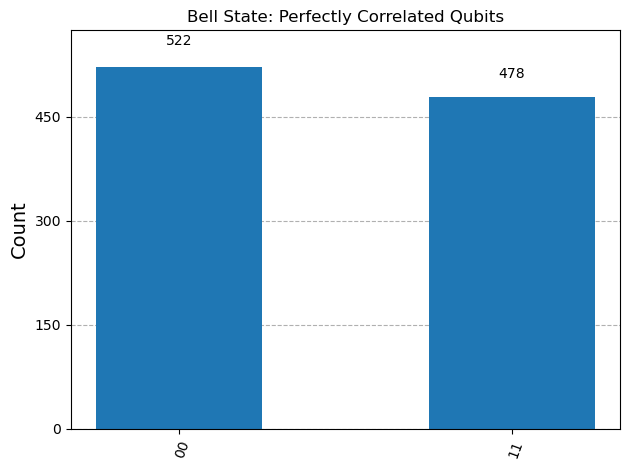

In [3]:
# Visualize the results with a histogram
plot_histogram(counts, title='Bell State: Perfectly Correlated Qubits')

## Why Entanglement Matters

Quantum entanglement is the foundation for many quantum technologies:

🔐 **Quantum Cryptography**
- Enables perfectly secure communication
- Any eavesdropping can be detected instantly

⚡ **Quantum Teleportation**
- Transfer quantum states between distant locations
- Essential for quantum networks

💻 **Quantum Computing**
- Entanglement provides computational power
- Many quantum algorithms rely on entangled states